# Name- Bhanu Katoch

# Exp.- Maxwell Speed Distribution

# Statistical Mechanics 

In [59]:
import numpy as np
import matplotlib.pyplot as plt

In [60]:
#constants
k = 1.38e-23
u = 1.6605e-27
m = 15.966*u #oxygen molecule 
n =1000
tk=300.0# particular Temperature
#set temp range from 20K at least for 3-d plot 
T= np.linspace(50.0,300.0,n)
v = np.linspace(0,1500,n)

In [61]:
#Maxwell_distribution Function
def MB(v,T):
    f1 = 4*np.pi*(m/(2*np.pi*k*T))**(3.0/2.0)
    f2 = v**2
    f3 = (np.exp(-((m*v**2)/(2*k*T))))
    return f1*f2*f3


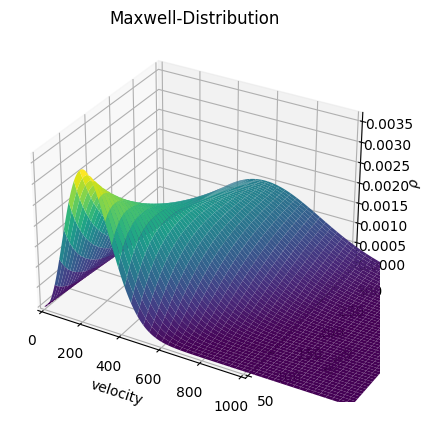

In [62]:
#3-D plot
fig = plt.figure()
# syntax for 3-D projection
ax = plt.axes(projection ='3d')
ax.set_xlim3d([0.0, 1000.0])
ax.set_xlabel('velocity')

ax.set_ylim3d([50.0, 300.0])
ax.set_ylabel('temp.')

ax.set_zlabel(r'$\rho$')
ax.set_title("Maxwell-Distribution")

X,Y = np.meshgrid(v,T)
Z = MB(X,Y) 
ax.plot_surface(X,Y,Z,cmap='viridis')
plt.show()

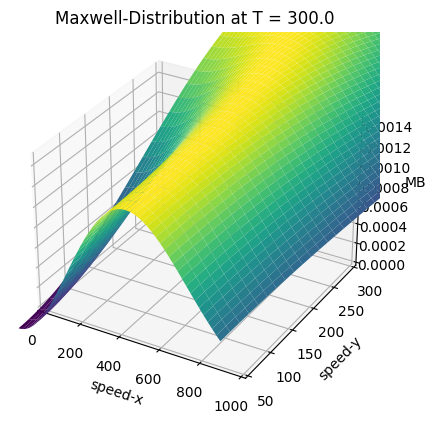

In [63]:
#Vx, vy plot

fig = plt.figure()
# syntax for 3-D projection
ax = plt.axes(projection ='3d')
ax.set_xlim3d([0.0, 1000.0])
ax.set_xlabel('speed-x')

ax.set_ylim3d([50.0, 300.0])
ax.set_ylabel('speed-y')

ax.set_zlabel('MB')
ax.set_title("Maxwell-Distribution at T = "+str(tk))


# In[64]:


def MB_(vx,vy,T):
    v = (vx**2+vy**2)**0.5	
    f1 = 4*np.pi*(m/(2*np.pi*k*T))**(3.0/2.0)
    f2 = v**2
    f3 = (np.exp(-((m*v**2)/(2*k*T))))
    return f1*f2*f3


# for i in range(0,10):
#     print(MB(i,373.0))

# In[65]:


#plt.plot(v,MB(v,T[100]))


# In[66]:

X,Y = np.meshgrid(vx,vy)
Z = MB_(X,Y,tk) 
ax.plot_surface(X,Y,Z,cmap='viridis')
plt.show()

v_a is average velocity function

v_r is root mean square velocity function

v_m is most probable velocity function

In [64]:
def v_a(v):
    T=tk
    f1 = 4*np.pi*(m/(2*np.pi*k*T))**(3.0/2.0)
    f2 = v**2
    f3 = (np.exp(-((m*v**2)/(2*k*T))))
    return v*f1*f2*f3
    
def v_r(v):
    T=tk
    f1 = 4*np.pi*(m/(2*np.pi*k*T))**(3.0/2.0)
    f2 = v**2
    f3 = (np.exp(-((m*v**2)/(2*k*T))))
    return v**2*f1*f2*f3

#max v
R = v
def v_m(t):
    w = MB(R,t)
    for i in R:
        if MB(i,t)==np.max(w):
            return i


In [65]:
import scipy.integrate as sc
va=sc.quad(v_a,0.0,np.inf)[0]
vae=((8*k*tk)/(np.pi*m))**0.5

vr=(sc.quad(v_r,0.0,np.inf)[0])**0.5
vre=((3*k*tk)/(m))**0.5

def p_(f,f1):
    return abs((f-f1)/f)*100

print('At T = ',tk,'K')
print("\naverage - v :",va)
print("average % error :",p_(vae,va),"%")

print("\nrms - v :",vr)
print("rms % error :",p_(vre,vr),"%")

print("\nmax - v :",v_m(tk))


At T =  300.0 K

average - v : 630.5981978586785
average % error : 7.211364580974839e-14 %

rms - v : 684.4524706390843
rms % error : 1.6609895149544104e-14 %

max - v : 558.5585585585585


In [66]:
lsa=['-','--',':']
ma=['o','v','*']
la=['max','avg','rms']

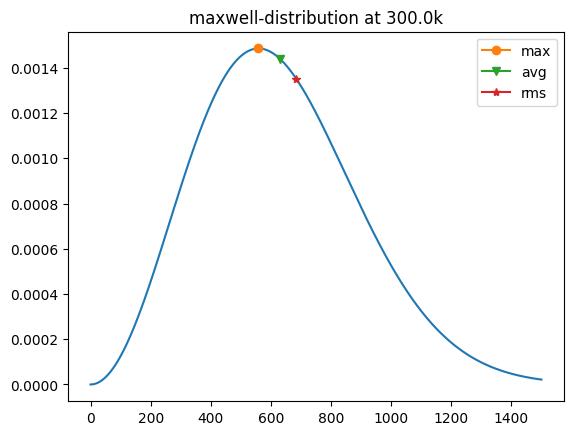

In [67]:
#plot for avg,rms,max velocity
v_i=[v_m(tk),va,vr]
v_o=[MB(v_i[0],tk),MB(v_i[1],tk),MB(v_i[2],tk)]

plt.plot(v,MB(v,tk))
plt.title('maxwell-distribution at '+str(tk)+'k')

for i in range(3):
	plt.plot(v_i[i],v_o[i],marker=ma[i],label=la[i])
plt.legend(loc='best')
plt.show()


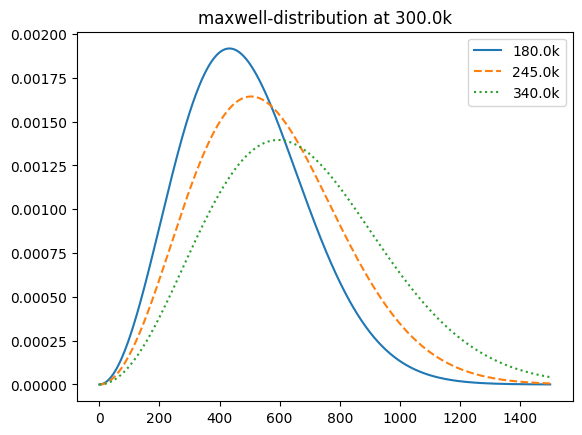

In [68]:
#plot for different temperatures
Tr=[180.0,245.0,340.0]
plt.title('maxwell-distribution at '+str(tk)+'k')
for i in range(3):
	plt.plot(v,MB(v,Tr[i]),label=str(Tr[i])+'k',ls=lsa[i])
plt.legend(loc='best')
plt.show()